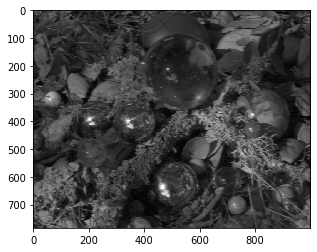

In [28]:
#desperat forsøk på implisitt 2d poisson
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

file= '../../hdr-bilder/Balls/Balls_00032.png'
u=imageio.imread(file)
u = np.sum(u.astype(float), 2) / (3 * 255)   # konverter til gråtone

N_punkter = u.shape[1]
N_tider = u.shape[0]
alpha = 0.3      #dt/dx**2



#lager diagonalmatrise
upper1= np.concatenate(([0, 0], -alpha * np.ones(N_punkter - 2)))
upper2= np.concatenate(([0, 0, 0], -alpha * np.ones(N_punkter - 3)))
center= np.concatenate(([1], (1 + 2 * alpha) * np.ones(N_punkter - 2),[1]))
lower1 = np.concatenate((-alpha * np.ones(N_punkter - 2), [0, 0]))
lower2 = np.concatenate((-alpha * np.ones(N_punkter - 3), [0, 0, 0]))
diags = np.array([upper2, upper1, center, lower1, lower2])
A=spdiags(diags, [2,1,0,-1,-2], N_punkter, N_punkter).tocsc()

for n in range(N_tider-1):
    u[n+1, :]=spsolve(A, u[n+1, :])
    
    u[:, 0] = u[:, 1]      # Neumann randbetingelse
    u[:, -1] = u[:, -2]    #
    u[0, :] = u[1, :]      #
    u[-1, :] = u[-2 , :]   #
    
    
plt.imshow(u,plt.cm.gray)
